## 0.  Import Libraries

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import datetime
import matplotlib
import zipfile
import glob
import os
import time
import shutil

from IPython.display import clear_output
from dask.diagnostics import ProgressBar

In [2]:
def plot_indices(data, cmap, label_name):
    
    p = data.plot.pcolormesh(x='rlon', 
                             y='rlat',
                             col='year',
                             col_wrap=5,
                             robust=True,
                             cmap=cmap,
                             add_colorbar=True,
                             cbar_kwargs={
                                 'location':'bottom',
                                 'shrink':0.4,
                                 'pad':-0.1,
                                 'label':label_name
                             },
                             vmin = 0,
                             vmax=1100
                            )
    return p

cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Random gradient 3918', (
    # Edit this gradient at https://eltos.github.io/gradient/#Random%20gradient%203918=0:902E4F-10.4:994D25-20.8:BE8A00-38.3:B2BE00-57.1:6CA519-71.4:21C4C7-85.7:265498-100:982696
    (0.000, (0.565, 0.180, 0.310)),
    (0.104, (0.600, 0.302, 0.145)),
    (0.208, (0.745, 0.541, 0.000)),
    (0.383, (0.698, 0.745, 0.000)),
    (0.571, (0.424, 0.647, 0.098)),
    (0.714, (0.129, 0.769, 0.780)),
    (0.857, (0.149, 0.329, 0.596)),
    (1.000, (0.596, 0.149, 0.588))))

## 1. Open Data

In [3]:
season = 'DJF'
path_general = r'/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data'

### 1.1 Vector Data

In [4]:
turkey_bool = xr.open_dataset(fr"{path_general}/data/TOT_PREC/cosmo/BC/vectorized_turkey.nc")

In [4]:
era5land_bool = xr.open_dataset(fr"{path_general}/data/TOT_PREC/cosmo/BC/vectorized_turkey_mask_from_era5land.nc")

In [5]:
turkey_bool = turkey_bool.rename({'TOT_PREC': 'tp'})

### 1.2 ERA5

In [6]:
dt_era5 = xr.open_dataset(fr'{path_general}/era5/era5_TOT_PREC_{season}_1hr_regrid_1985_2005.nc',
                          )

In [7]:
dt_era5

<xarray.Dataset>
Dimensions:  (time: 46368, rlat: 107, rlon: 175)
Coordinates:
  * time     (time) datetime64[ns] 1985-06-01 ... 2005-08-31T23:00:00
    lon      (rlat, rlon) float32 ...
    lat      (rlat, rlon) float32 ...
  * rlon     (rlon) float32 -8.3 -8.19 -8.08 -7.97 ... 10.51 10.62 10.73 10.84
  * rlat     (rlat) float32 -6.2 -6.09 -5.98 -5.87 -5.76 ... 5.13 5.24 5.35 5.46
Data variables:
    tp       (time, rlat, rlon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Wed Feb 01 14:38:16 2023: cdo remapbil,../cosmo/Tr011_MPI_R...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

In [8]:
dt_era5_year_sum = dt_era5.groupby(group='time.year').sum()

In [9]:
dt_era5_year_sum_tr = dt_era5_year_sum['tp'].where(turkey_bool==1)

#### 1.2.1 Plot

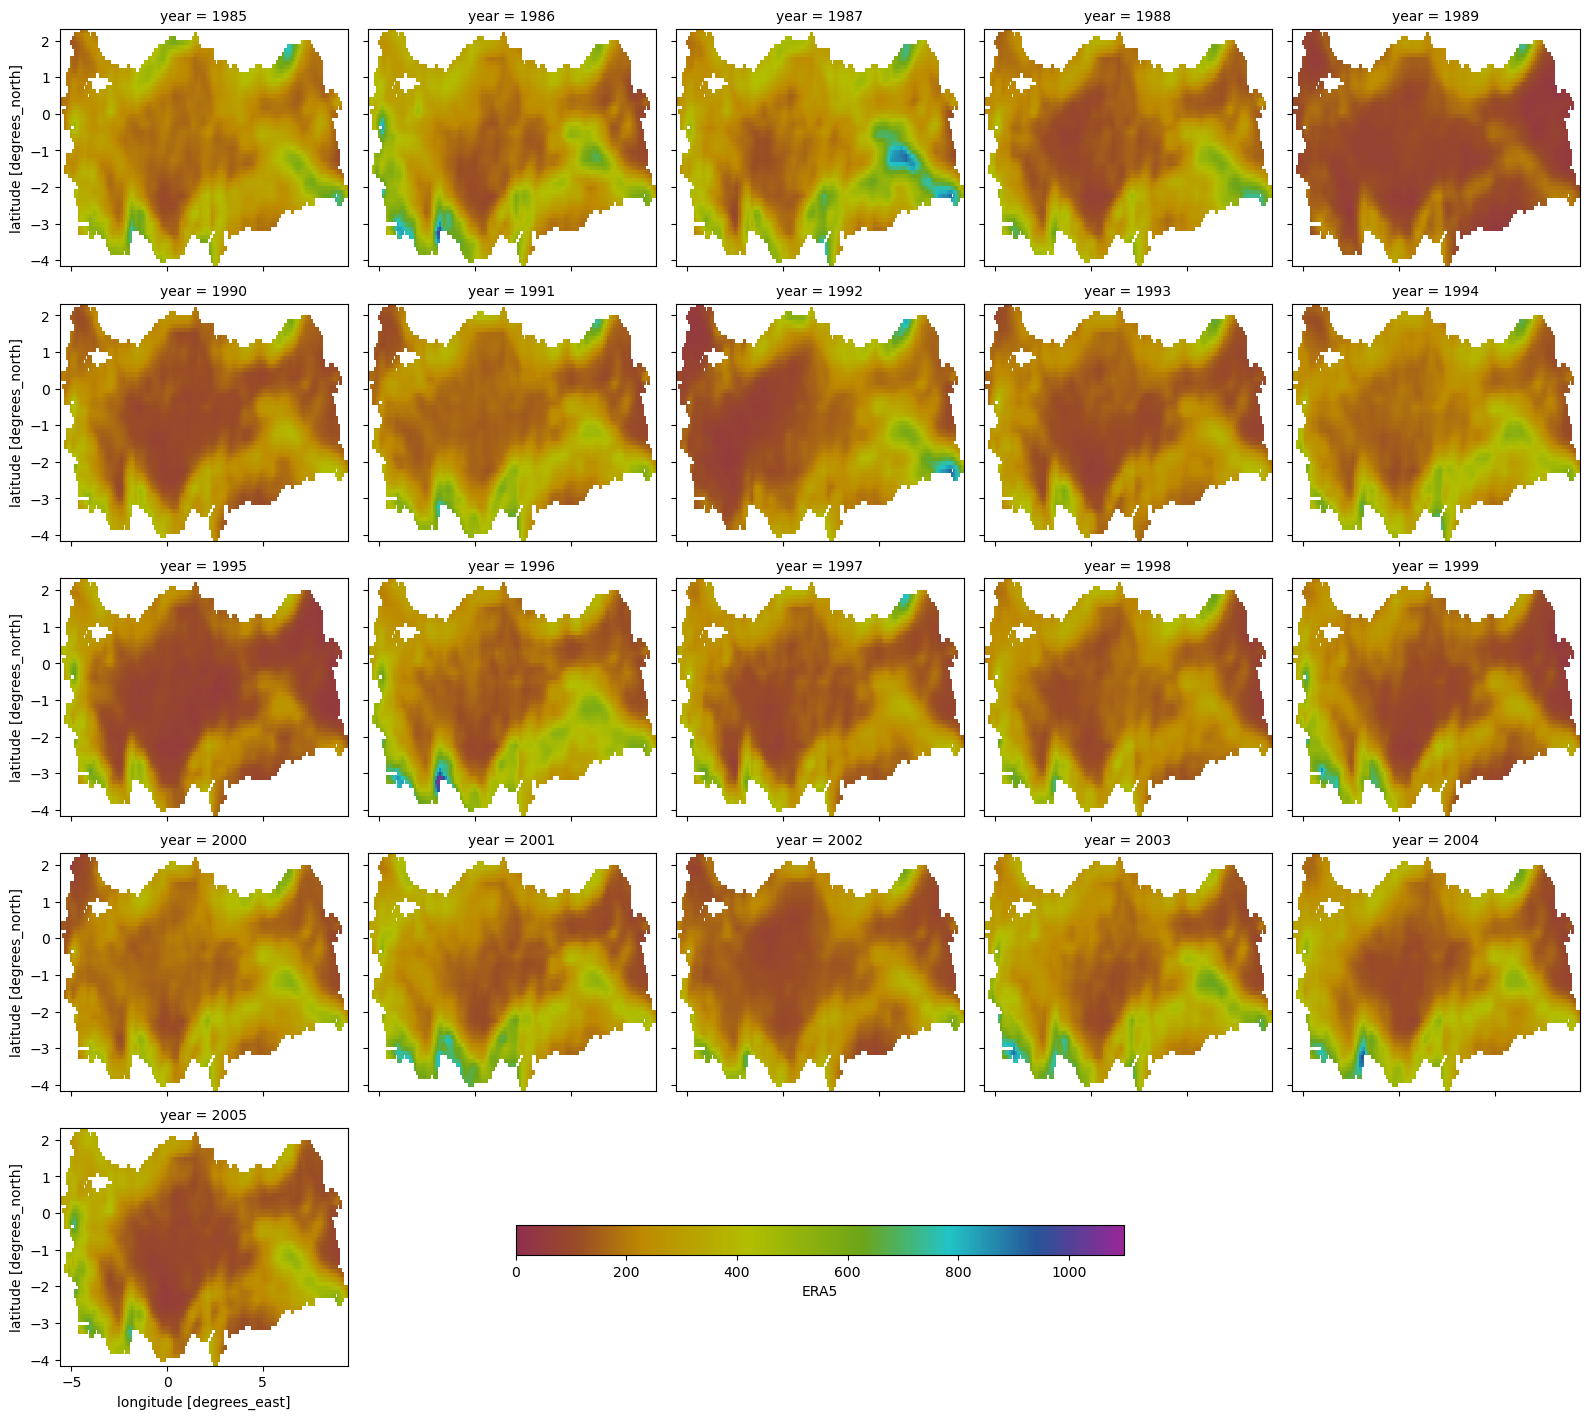

In [49]:
# plot DJF
plot_indices(dt_era5_year_sum_tr['tp']* 1e3, cmap, fr'ERA5-{season}')

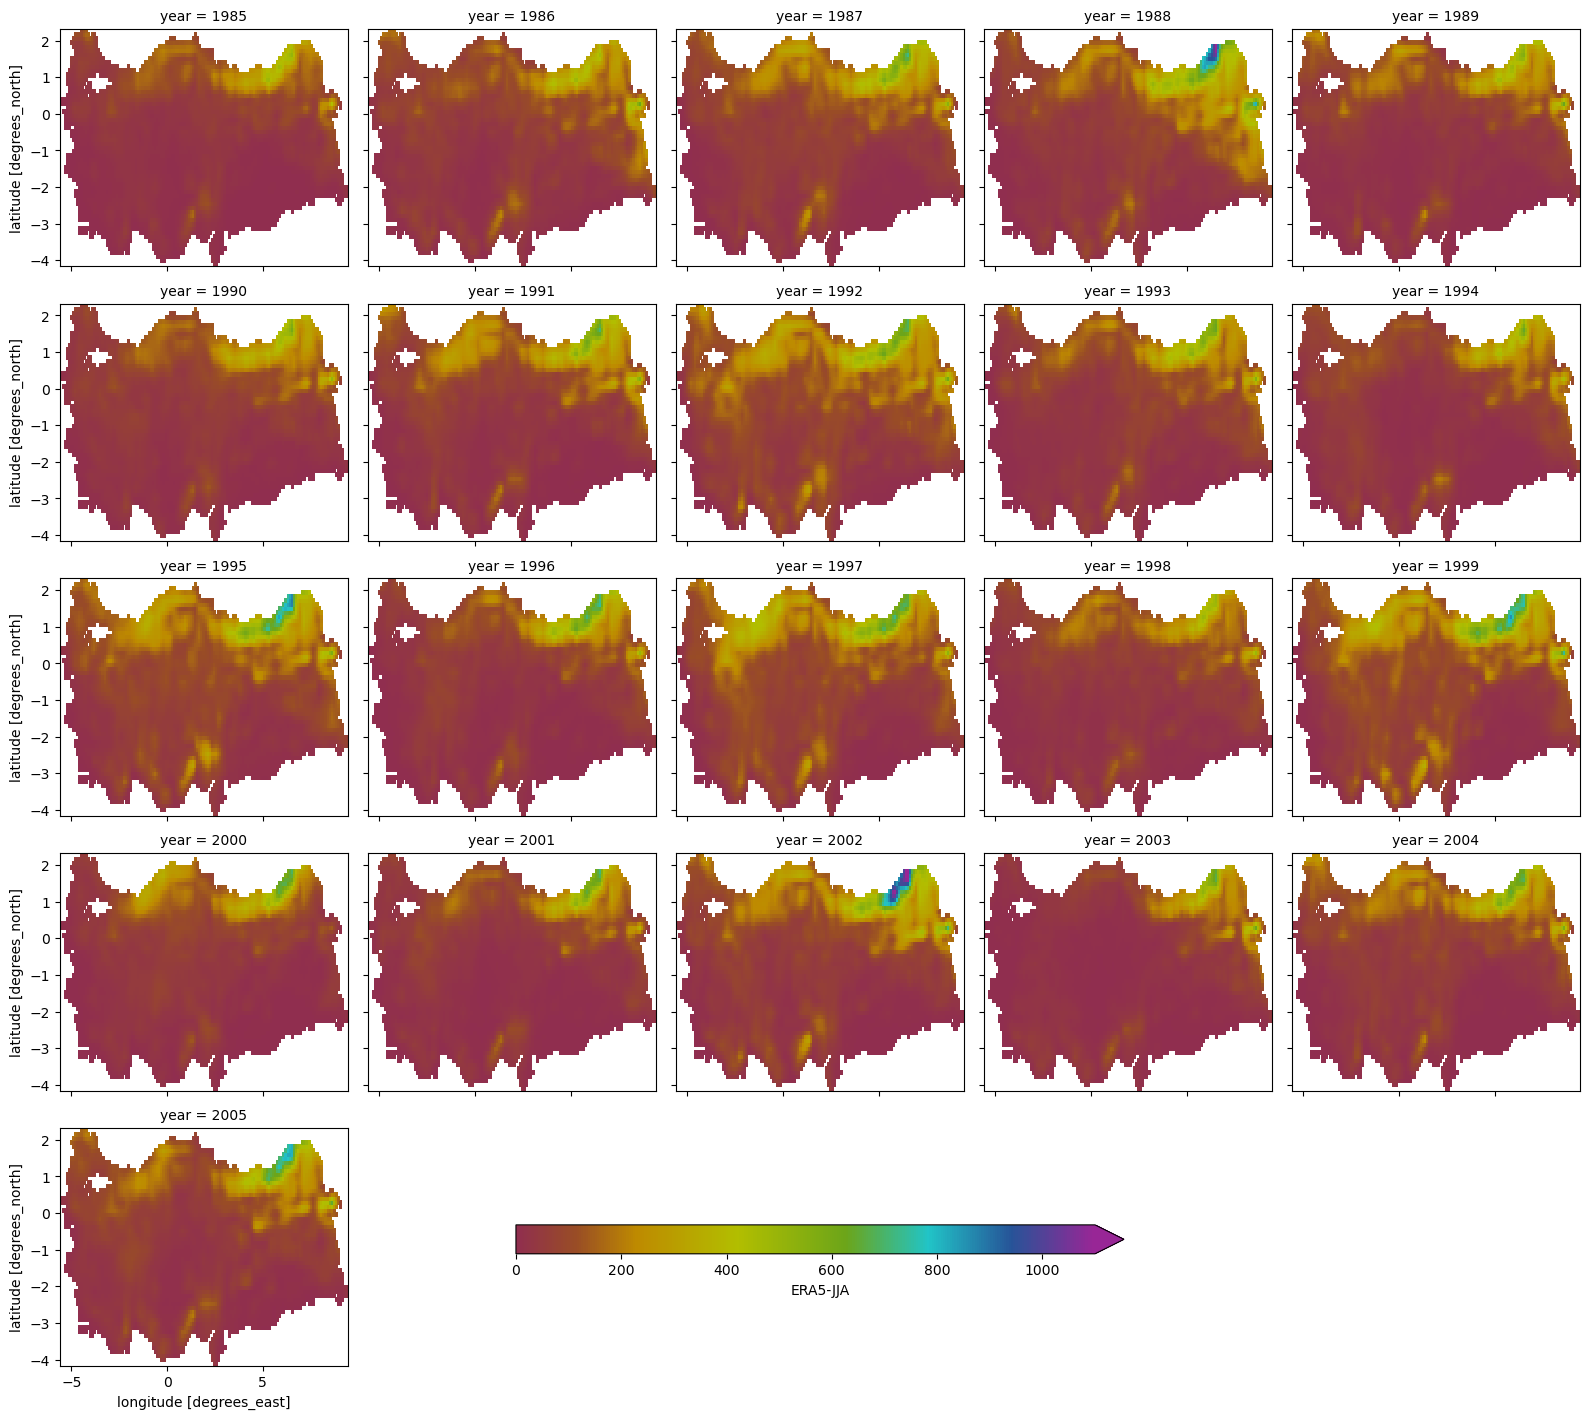

In [10]:
# plot JJA
plot_indices(dt_era5_year_sum_tr['tp']* 1e3, cmap, fr'ERA5-{season}')

### 1.3 ERA5-Land

In [5]:
dt_era5land = xr.open_dataset(fr'{path_general}/era5land/era5land_TOT_PREC_{season}_1hr_regrid_1985_2005.nc',
                          )

In [6]:
dt_era5land

<xarray.Dataset>
Dimensions:  (time: 45480, rlat: 107, rlon: 175)
Coordinates:
  * time     (time) datetime64[ns] 1985-01-01 ... 2005-12-31T23:00:00
    lon      (rlat, rlon) float32 ...
    lat      (rlat, rlon) float32 ...
  * rlon     (rlon) float32 -8.3 -8.19 -8.08 -7.97 ... 10.51 10.62 10.73 10.84
  * rlat     (rlat) float32 -6.2 -6.09 -5.98 -5.87 -5.76 ... 5.13 5.24 5.35 5.46
Data variables:
    tp       (time, rlat, rlon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Wed Mar 08 14:25:49 2023: cdo remapbil,../cosmo/Tr011_MPI_R...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

### 1.3.1 Clip era5land with its own mask

In [9]:
dt_era5land_bool = dt_era5land['tp'].where(era5land_bool==1)
dt_era5land_bool = dt_era5land_bool.rename({'Tw':'tp'})

In [14]:
dt_era5land_bool.to_netcdf(fr'{path_general}/era5land/era5land_TOT_PREC_{season}_1hr_regrid_masked_1985_2005.nc',
                          )

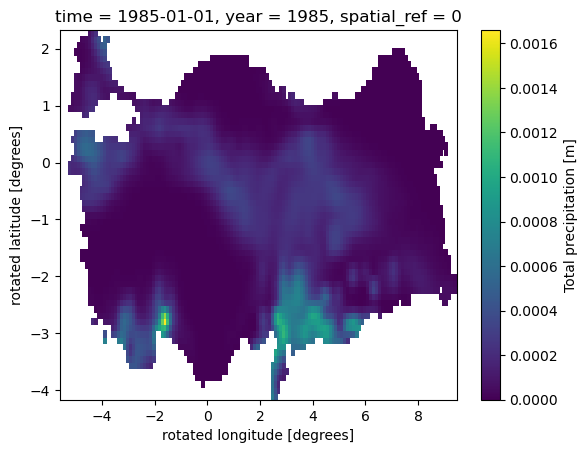

In [13]:
dt_era5land_bool['tp'][0].plot()

end to 1.3.1

In [8]:
dt_era5land_year_sum = dt_era5land.groupby(group='time.year').sum()

In [9]:
dt_era5land_year_sum_tr = dt_era5land_year_sum['tp'].where(turkey_bool==1)

#### 1.2.1 Plot

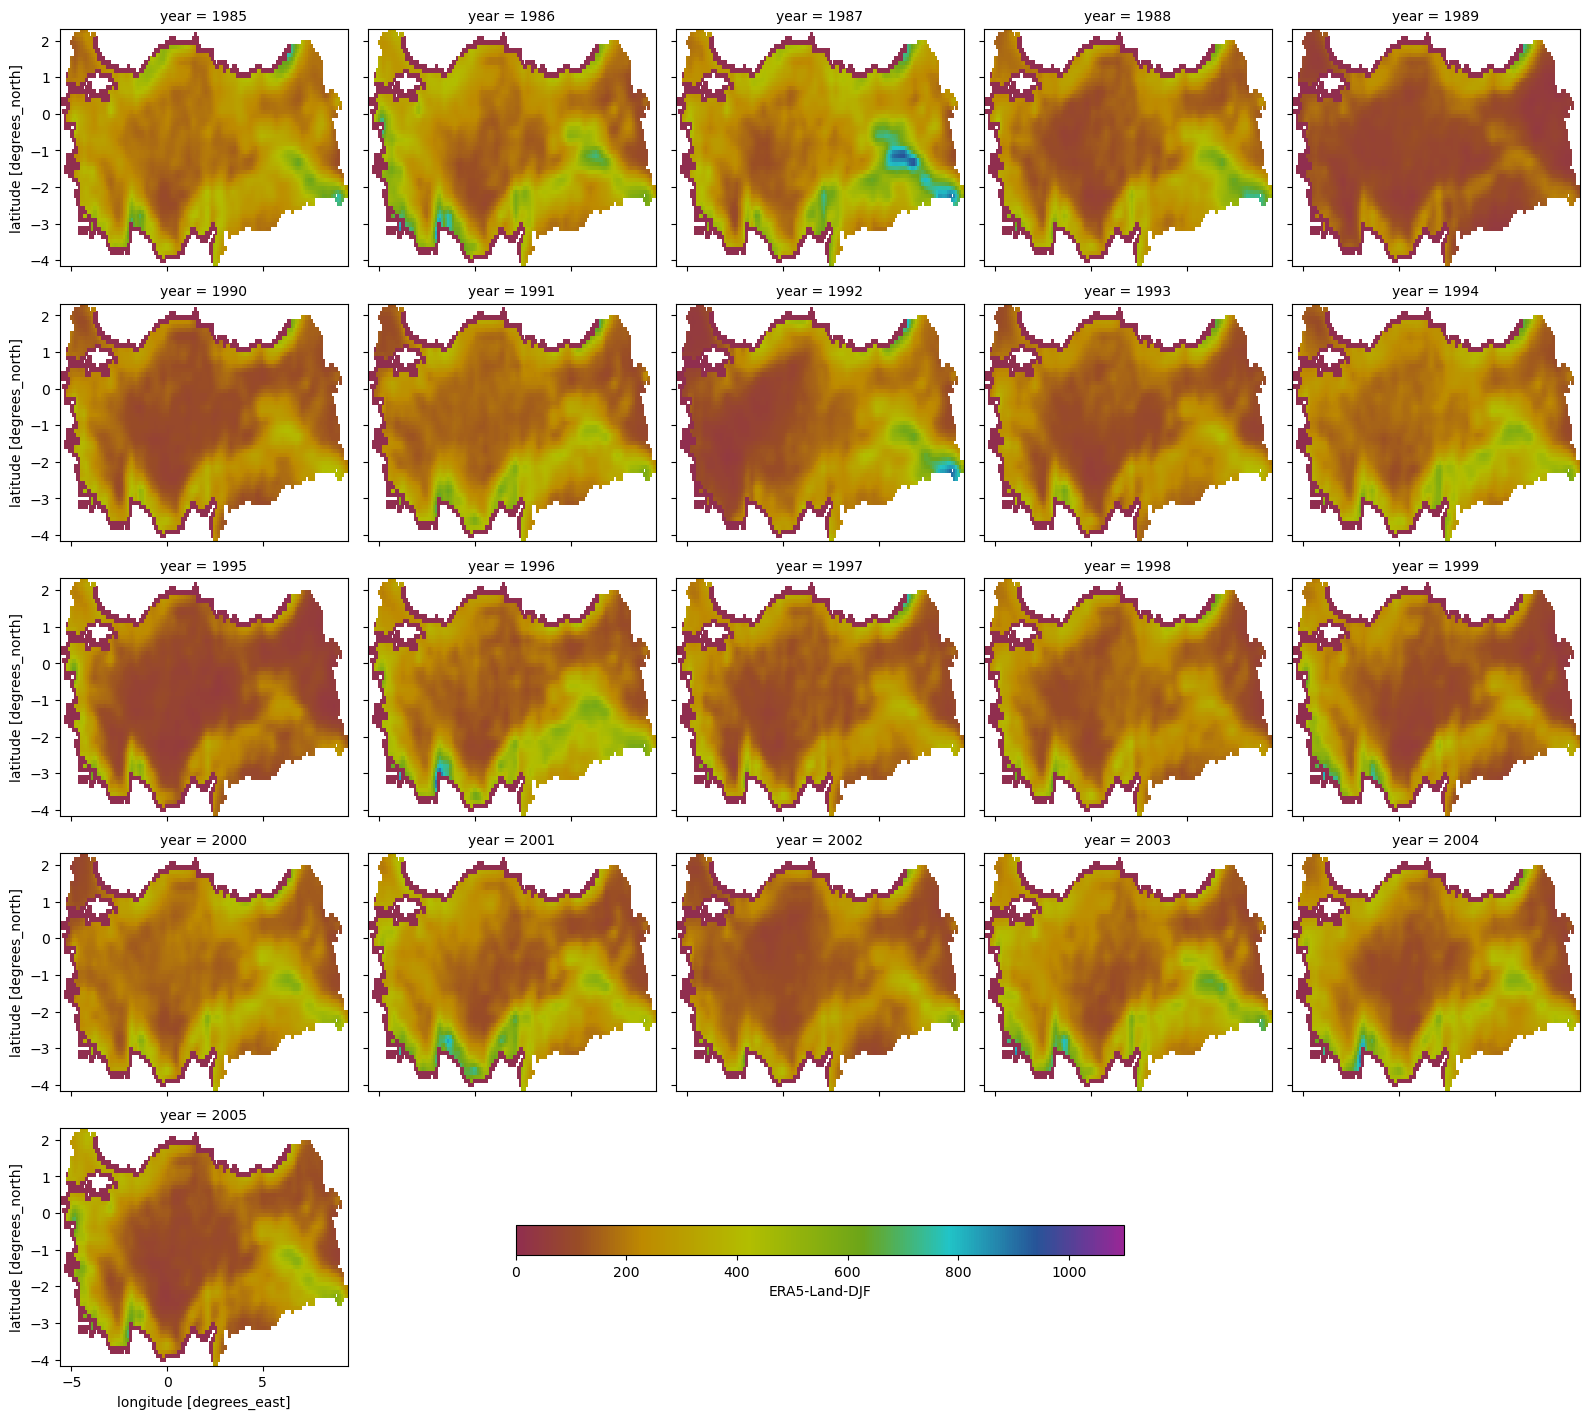

In [17]:
# plot DJF
plot_indices(dt_era5land_year_sum_tr['tp']* 1e3, cmap, fr'ERA5-Land-{season}')

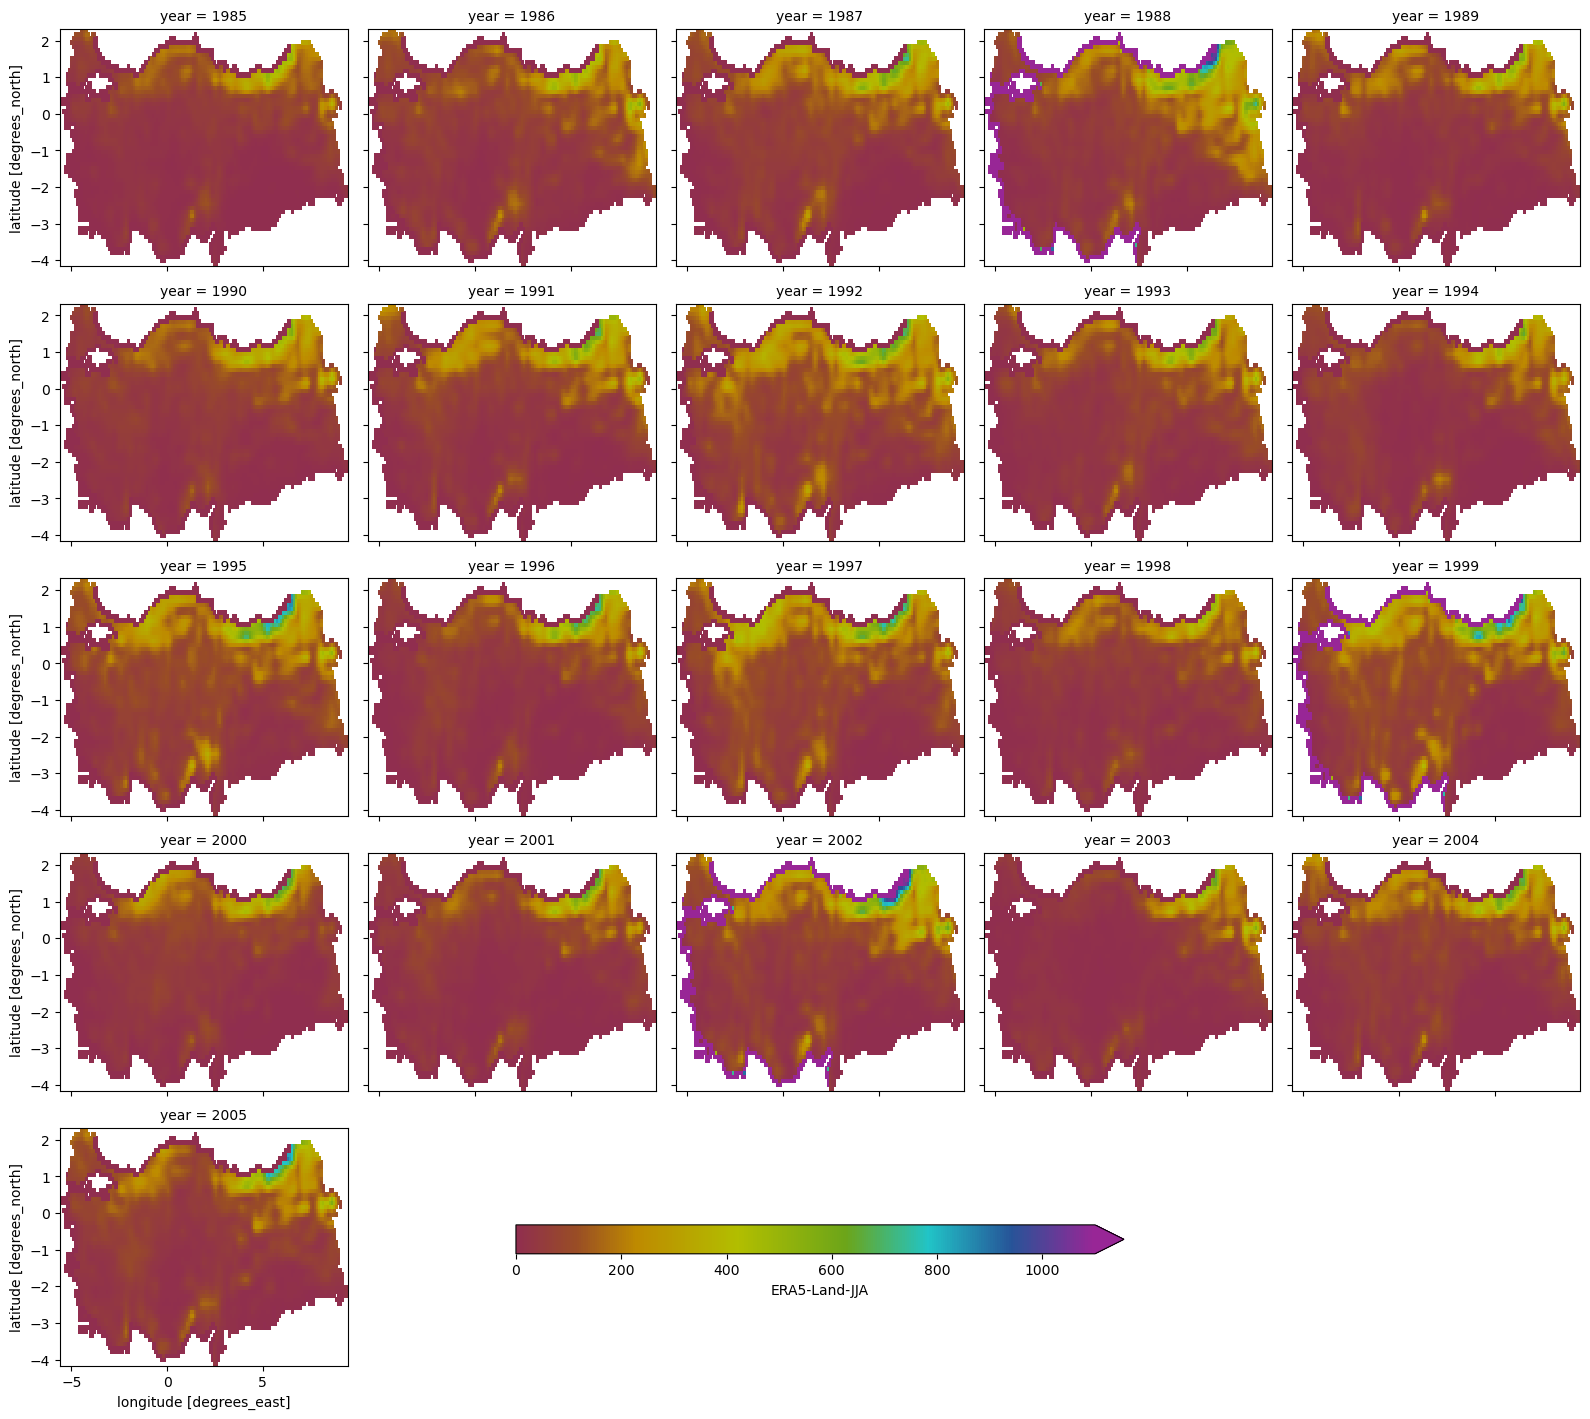

In [10]:
# plot JJA
plot_indices(dt_era5land_year_sum_tr['tp']* 1e3, cmap, fr'ERA5-Land-{season}')

### 1.4 Difference

In [6]:
dt_era5 = xr.open_dataset(fr'{path_general}/era5/era5_TOT_PREC_{season}_1hr_regrid_1985_2005.nc',
                          )
dt_era5land = xr.open_dataset(fr'{path_general}/era5land/era5land_TOT_PREC_{season}_1hr_regrid_1985_2005.nc',
                          )

In [7]:
# aggregate
dt_era5_year_sum = dt_era5.groupby(group='time.year').sum()
dt_era5land_year_sum = dt_era5land.groupby(group='time.year').sum()

In [8]:
# tr grids
dt_era5_year_sum_tr = dt_era5_year_sum['tp'].where(turkey_bool==1)
dt_era5land_year_sum_tr = dt_era5land_year_sum['tp'].where(turkey_bool==1)

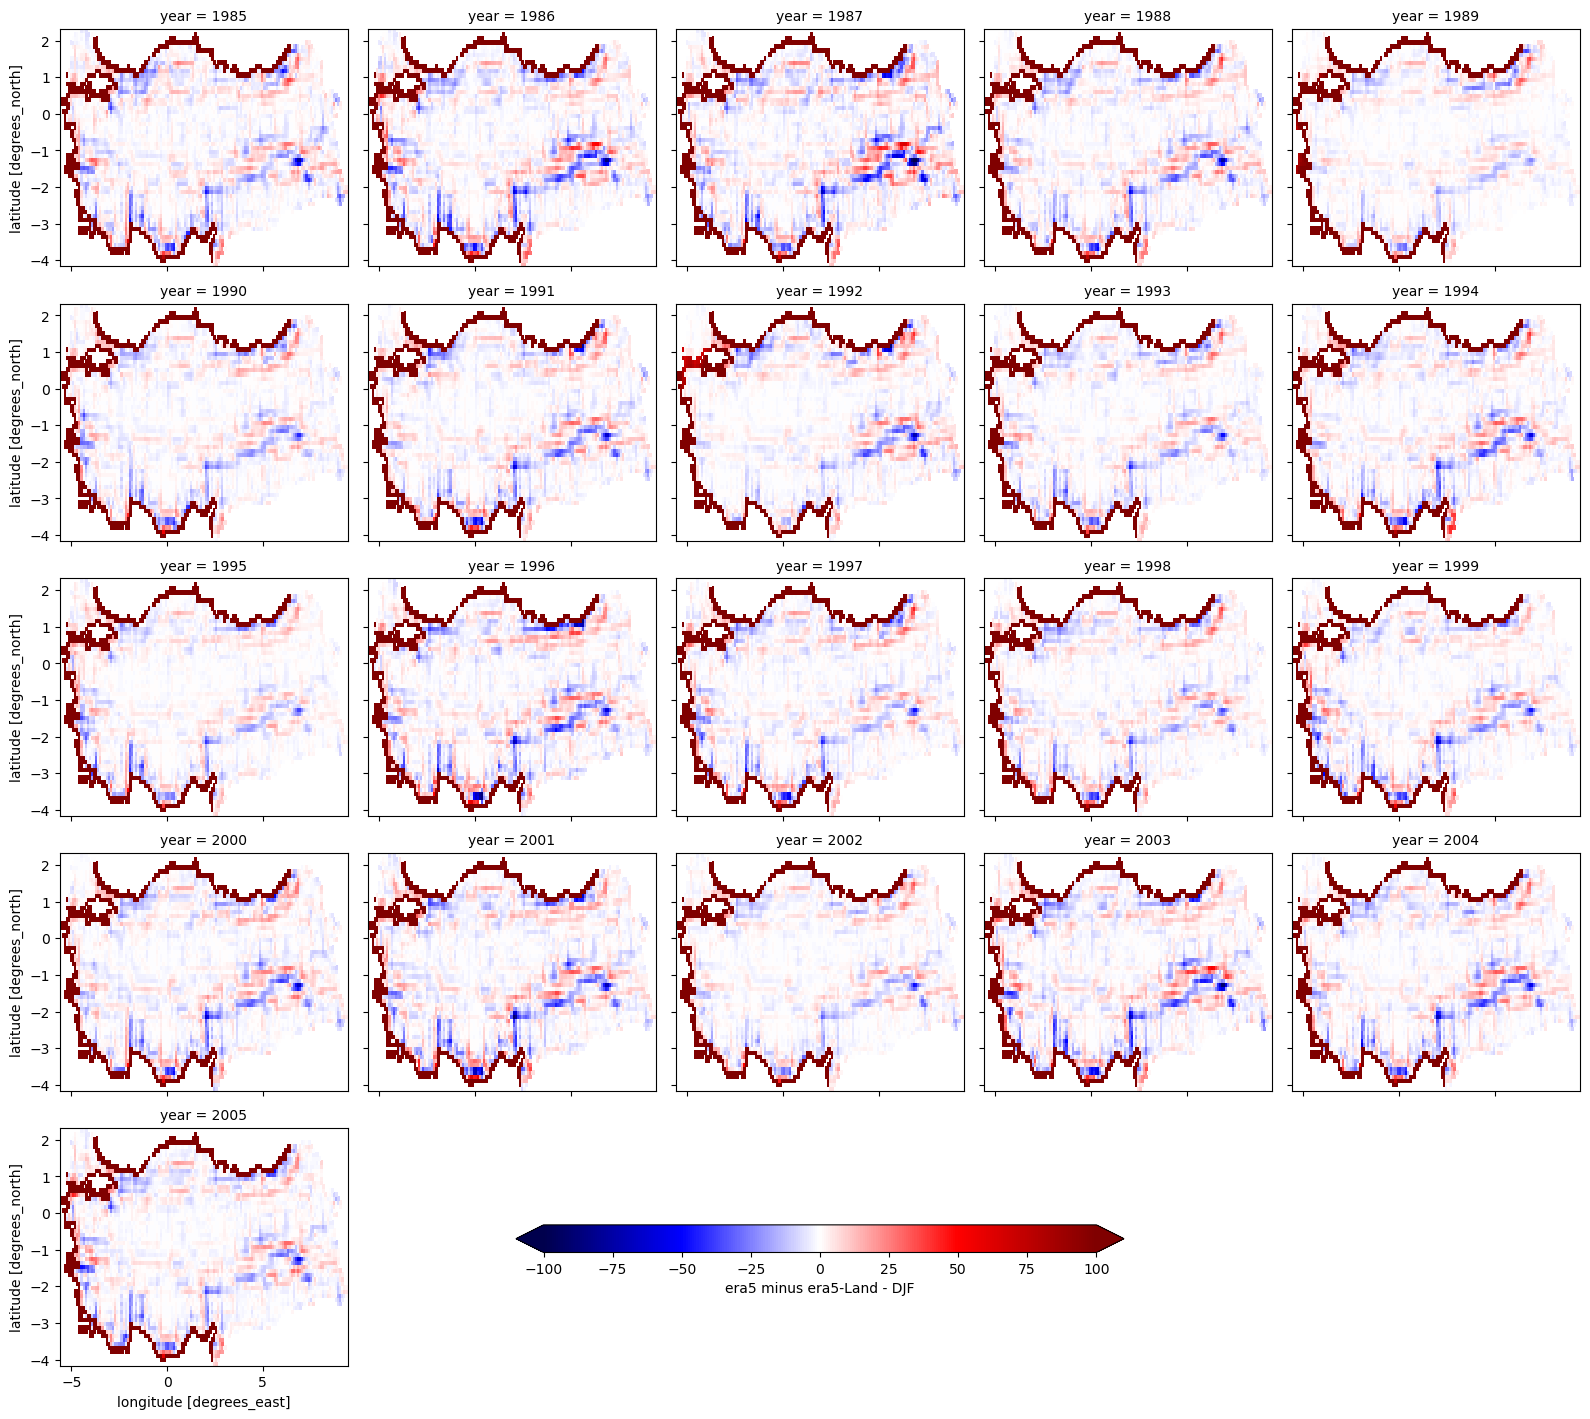

In [11]:
# difference DJF
(dt_era5_year_sum_tr['tp']*1e3 - dt_era5land_year_sum_tr['tp']*1e3).plot.pcolormesh( x='rlon', 
                                                                             y='rlat',
                                                                             col='year',
                                                                             col_wrap=5,
                                                                             robust=True,
                                                                             cmap='seismic',
                                                                             add_colorbar=True,
                                                                             cbar_kwargs={
                                                                                 'location':'bottom',
                                                                                 'shrink':0.4,
                                                                                 'pad':-0.1,
                                                                                 'label':fr'era5 minus era5-Land - {season}'
                                                                             },
                                                                             vmin=-100,
                                                                             vmax=100
                                                                            )

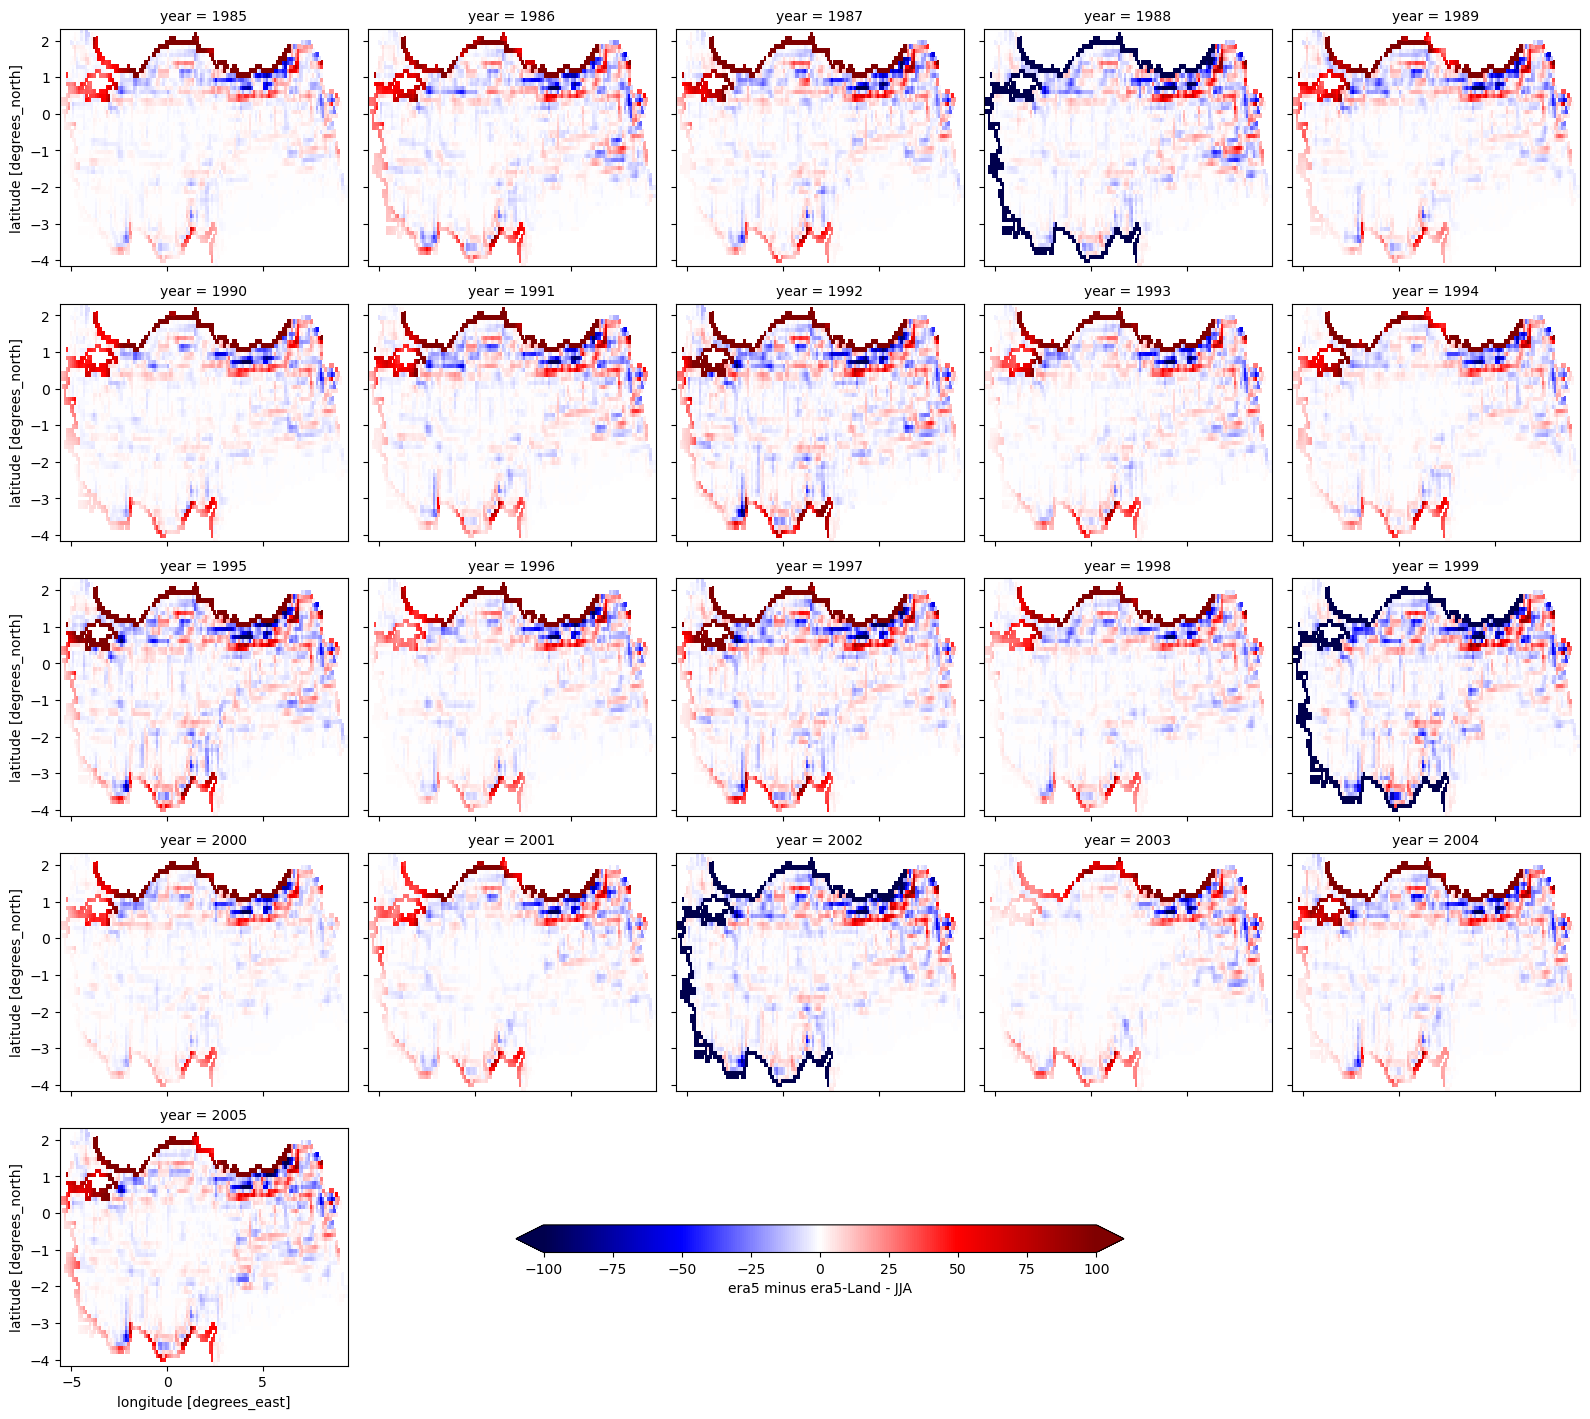

In [9]:
# difference JJA
(dt_era5_year_sum_tr['tp']*1e3 - dt_era5land_year_sum_tr['tp']*1e3).plot.pcolormesh( x='rlon', 
                                                                             y='rlat',
                                                                             col='year',
                                                                             col_wrap=5,
                                                                             robust=True,
                                                                             cmap='seismic',
                                                                             add_colorbar=True,
                                                                             cbar_kwargs={
                                                                                 'location':'bottom',
                                                                                 'shrink':0.4,
                                                                                 'pad':-0.1,
                                                                                 'label':fr'era5 minus era5-Land - {season}'
                                                                             },
                                                                             vmin=-100,
                                                                             vmax=100
                                                                            )

### 1.5 COSMO

In [5]:
dt_cosmo = xr.open_dataset(fr'{path_general}/cosmo/Tr011_MPI_RF_PR_{season}_1hr_198501_200512.nc',
                          )

In [6]:
dt_cosmo

<xarray.Dataset>
Dimensions:   (time: 45480, rlat: 107, rlon: 175)
Coordinates:
  * time      (time) datetime64[ns] 1985-01-01 ... 2005-12-31T23:00:00
    lon       (rlat, rlon) float32 ...
    lat       (rlat, rlon) float32 ...
  * rlon      (rlon) float32 -8.3 -8.19 -8.08 -7.97 ... 10.51 10.62 10.73 10.84
  * rlat      (rlat) float32 -6.2 -6.09 -5.98 -5.87 ... 5.13 5.24 5.35 5.46
Data variables:
    TOT_PREC  (time, rlat, rlon) float32 ...
Attributes: (12/13)
    CDI:                       Climate Data Interface version 1.9.10 (https:/...
    Conventions:               CF-1.4
    source:                    /home/yunal/cclm-sp-v3.1.1/src/cclm/cclm.exe}
    title:                     CCLM_v5.0_clm15 Simulation (0.11 Deg) with Med...
    experiment_id:             Tr0.11_RF
    realization:               1
    ...                        ...
    contact:                   Cemre Yuruk Sonuc (yurukc@itu.edu.tr)
    references:                http://www.clm-community.eu/
    creation_date:             2020-03-01 04:03:14
    nco_openmp_thread_number:  1
    history:                   Thu Dec 01 13:27:26 2022: cdo -select,season=D...
    CDO:                       Climate Data Operators version 1.9.10 (https:/...

### 1.5.1 Clip cosmo with era5land mask

In [7]:
dt_cosmo_bool = dt_cosmo['TOT_PREC'].where(era5land_bool==1)
dt_cosmo_bool = dt_cosmo_bool.rename({'Tw':'TOT_PREC'})

In [8]:
dt_cosmo_bool.to_netcdf(fr'{path_general}/cosmo/Tr011_MPI_RF_PR_{season}_1hr_masked_198501_200512.nc',
                          )